# Signal and System - Project 2

Writen by Aryan Zoroufi

Student ID: 9728273

* This code is wiriten in Google Colab enviroment. You can either run the code in Google colab through link above or run the .py file in your computer. if you are running the file in your computer please comment the data import cell and import the data manually

 link: https://colab.research.google.com/drive/1ftwxNfEi9Op4acuoi3nxpJZUlKcbmVtf?usp=sharing

* If you are using googl colab enviroment, please first create a shortcut of the following google drive file in your google drive home page to import data

  link: https://drive.google.com/drive/folders/1K9xbieSV4byIZ4t2bdhGY_kFi0QBH8Ku?usp=sharing

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy.fftpack import fft

# Import data

If you are not using google colab, please comment this cell and import data manually

In [0]:
from google.colab import drive
drive.mount('/content/drive')
sampling_rate_orig, data_orig = wavfile.read("/content/drive/My Drive/Signal2/Ghayegh2.wav") #import the wav file
sampling_rate_2n, data_2n = wavfile.read("/content/drive/My Drive/Signal2/Ghayegh2_1.wav") #import the wav file
sampling_rate_n2, data_n2 = wavfile.read("/content/drive/My Drive/Signal2/Ghayegh2_2.wav") #import the wav file

# Function to implement FFT

In [0]:
def make_fft(data):
    f_t =np.abs(np.fft.fftshift(data))
    x = np.linspace(- np.pi, np.pi, num=f_t.shape[0])
    return x, f_t

# Generate y[an] from y[n] (for question 7)

In [0]:
def time_scale(data, sampling_rate, scale):
    time = data.shape[0] / sampling_rate  #length of data matrix = number of collected samples --> time = number of collected samples/ sampling rate
    y =  data[0:data.shape[0]:scale]
    x = np.linspace(0,int(time),len(y))  #generate array with same number of elements as data beetween 0 and time * scale
    return x, y

# Function to generate DFT without using FFT

In [0]:
def dft(data):
    d_f = []
    n = np.linspace(0, data.shape[0] - 1, num = data.shape[0])
    for k in range(data.shape[0]+1):
        d_f.append(np.sum(np.dot(data,np.exp(-2j * np.pi/data.shape[0] * k * n))))
    return np.abs(np.array(d_f).real)

# Question 5

The furier transform of original data is plotted betwin -pi and pi(one period)


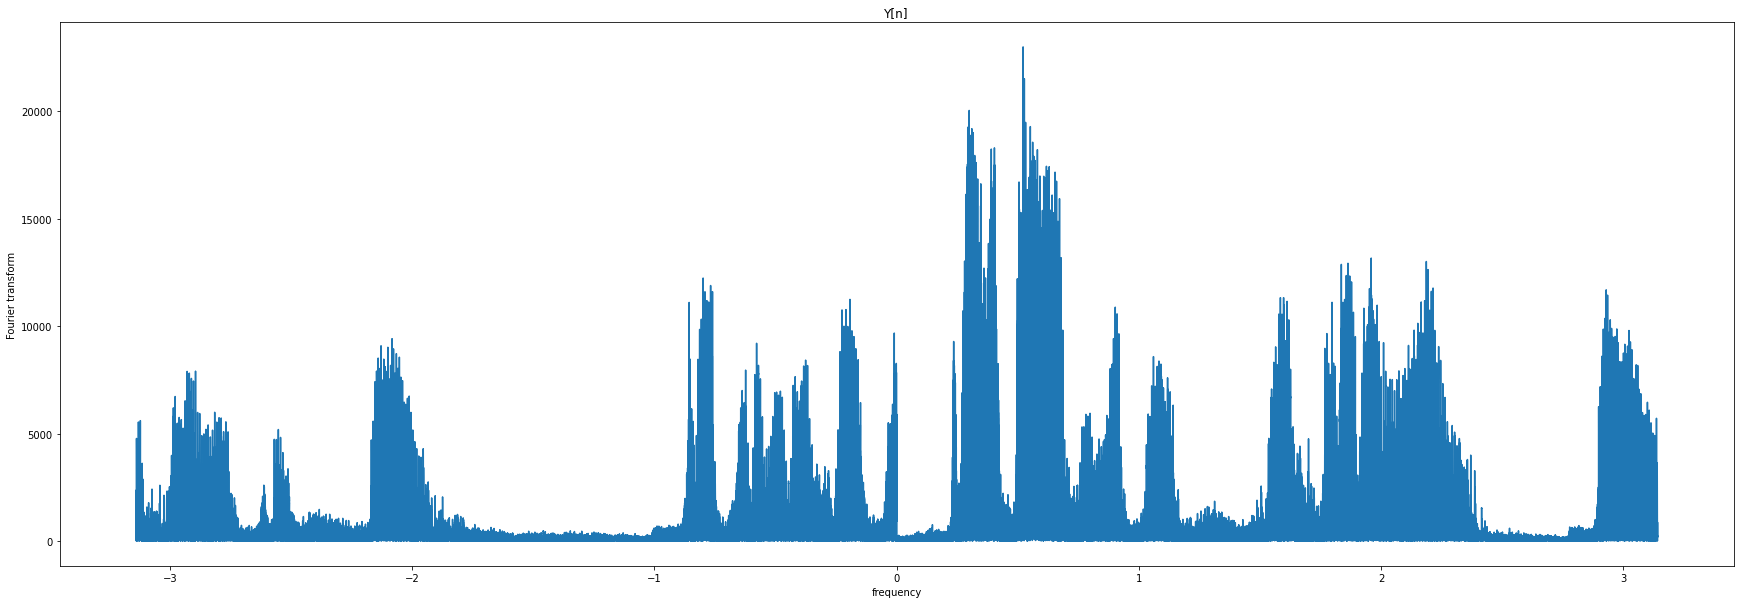

In [36]:
x_orig, f_t_orig = make_fft(data_orig)
plt.figure(figsize=(30,10))
plt.title('Y[n]')
plt.xlabel('frequency')
plt.ylabel('Fourier transform')
plt.plot(x_orig, f_t_orig)

# Question 6

First of all, we plot fourier transform of y[2n] and y[n/2] for all data points. They look almost same as each other and just like y[n]. Take a look at them in the cell below:

Text(0, 0.5, 'Fourier transform')

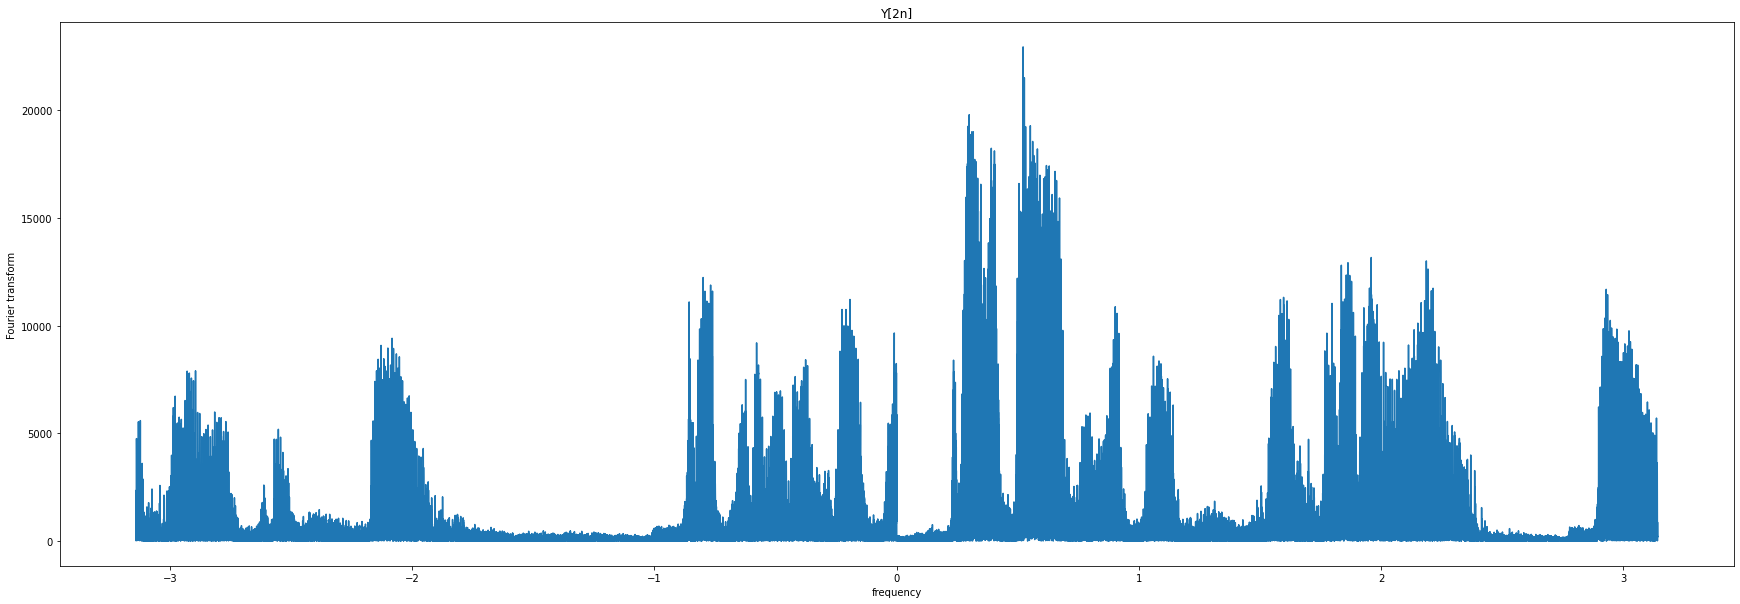

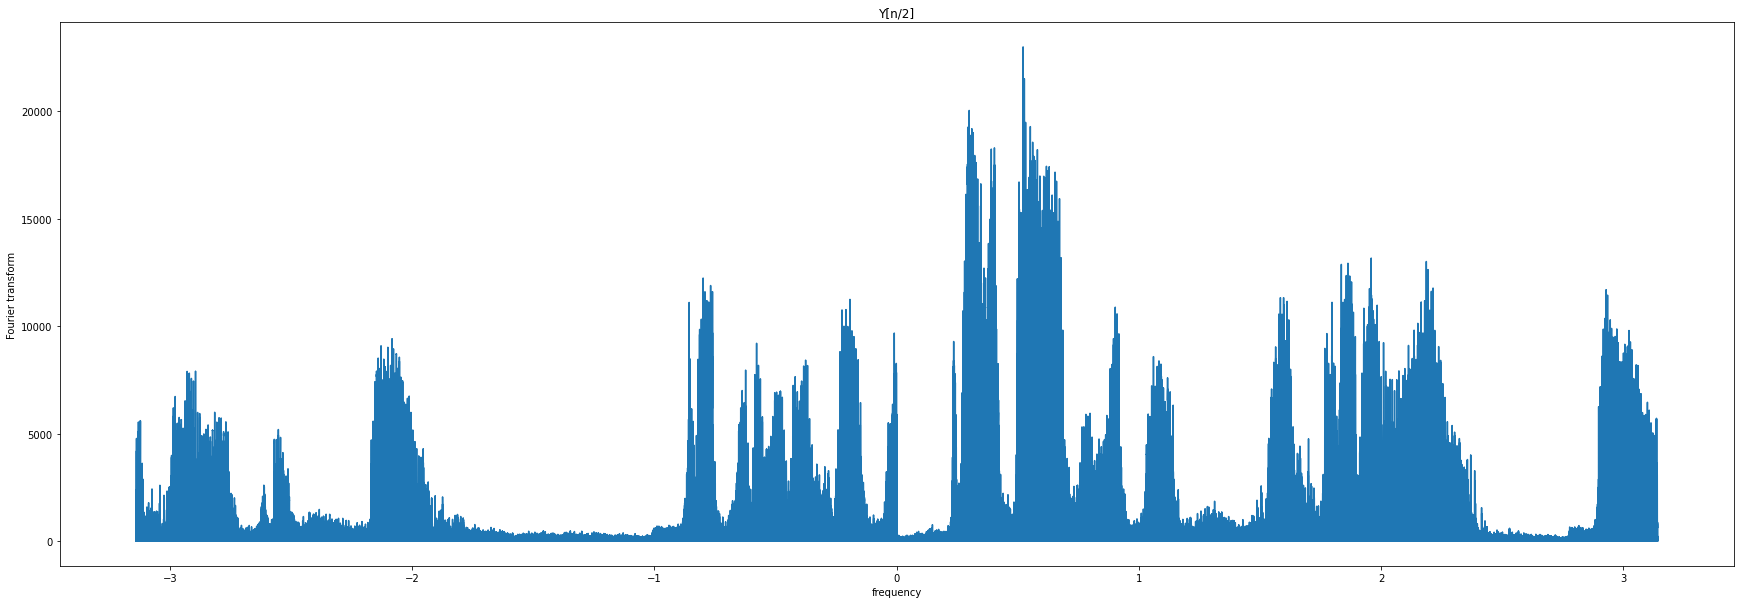

In [35]:
x_2n, f_t_2n = make_fft(data_2n)
x_n2, f_t_n2 = make_fft(data_n2)
plt.figure(figsize=(30,10))
plt.plot(x_2n, f_t_2n)
plt.title('Y[2n]')
plt.xlabel('frequency')
plt.ylabel('Fourier transform')
plt.figure(figsize=(30,10))
plt.plot(x_n2, f_t_n2)
plt.title('Y[n/2]')
plt.xlabel('frequency')
plt.ylabel('Fourier transform')

Now, to be more specific, we try to plot only first 100 samples of them. Now we can clearly see that although the envelope of signals are all the same, but in detail y[2n], y[n] and y[n/2] are not the same. y[2n] is a bit smoother because it has less samples and y[n/2] is a bit more spiking because we've added zero value to it.

Text(0, 0.5, 'Fourier transform')

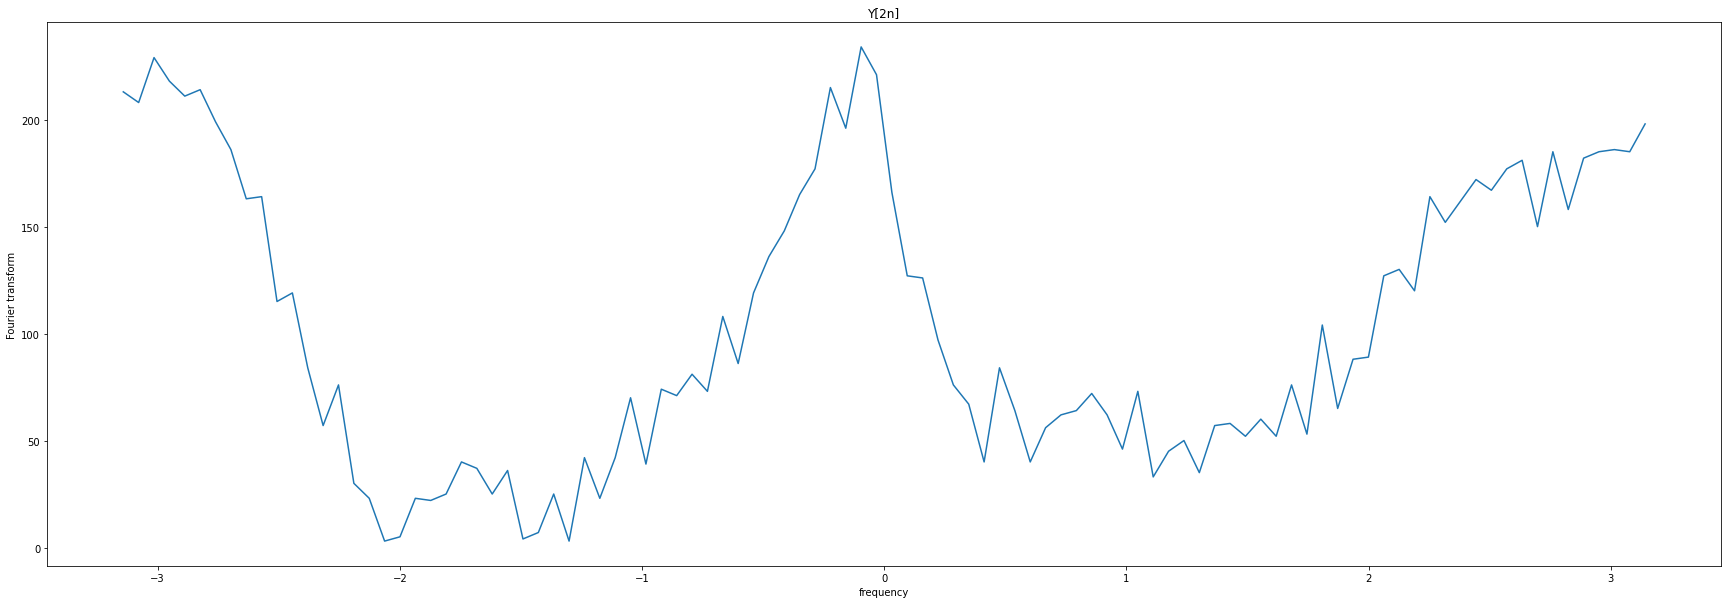

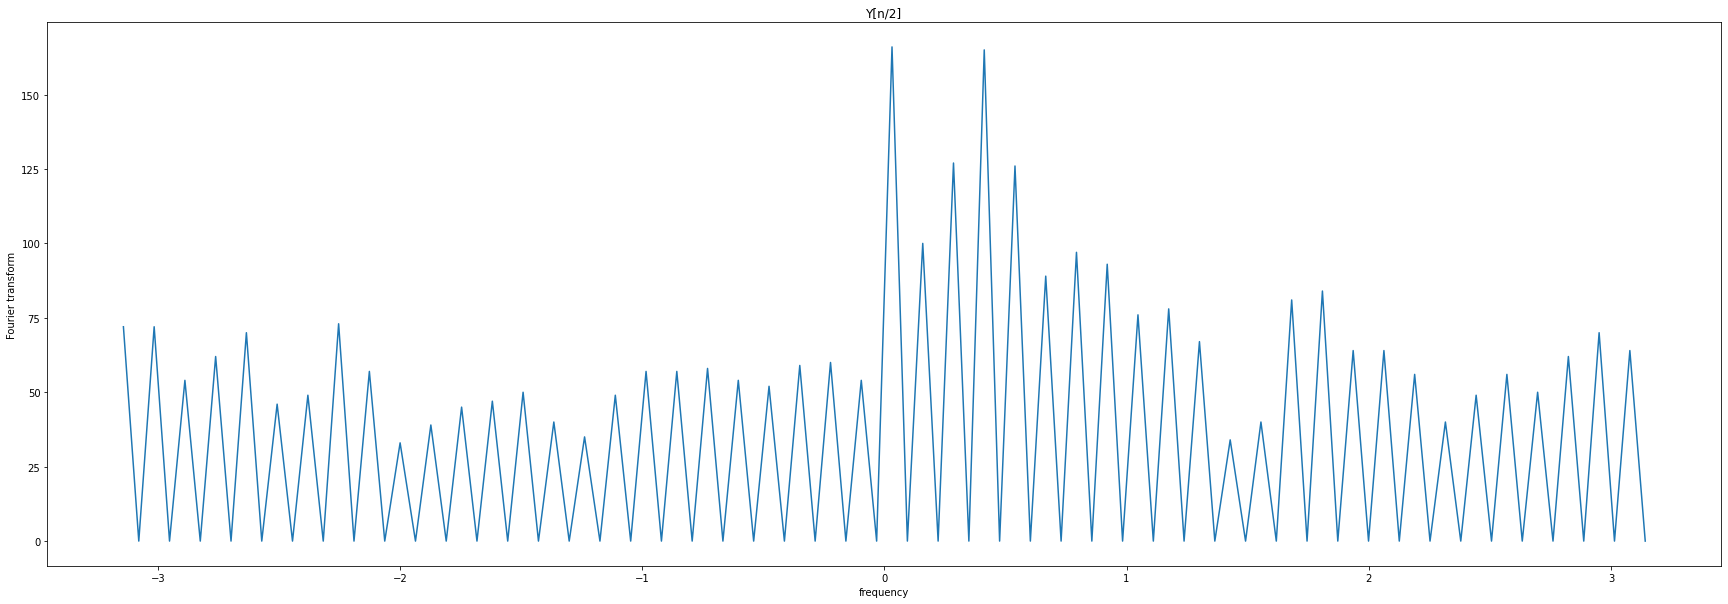

In [37]:
x_2n, f_t_2n = make_fft(data_2n[0:100])
x_n2, f_t_n2 = make_fft(data_n2[0:100])
plt.figure(figsize=(30,10))
plt.plot(x_2n, f_t_2n)
plt.title('Y[2n]')
plt.xlabel('frequency')
plt.ylabel('Fourier transform')
plt.figure(figsize=(30,10))
plt.plot(x_n2, f_t_n2)
plt.title('Y[n/2]')
plt.xlabel('frequency')
plt.ylabel('Fourier transform')

# Question 7

For resampling data we have to actually pick one out of each 3 of samples which is exactly same as making y[3n] so its time is 1/3 of our original data and it has lower quality because we have eleminated 2/3 of our data and picked only 1/3 of it. so it's obvious that the quality is lower comparing to original sounf

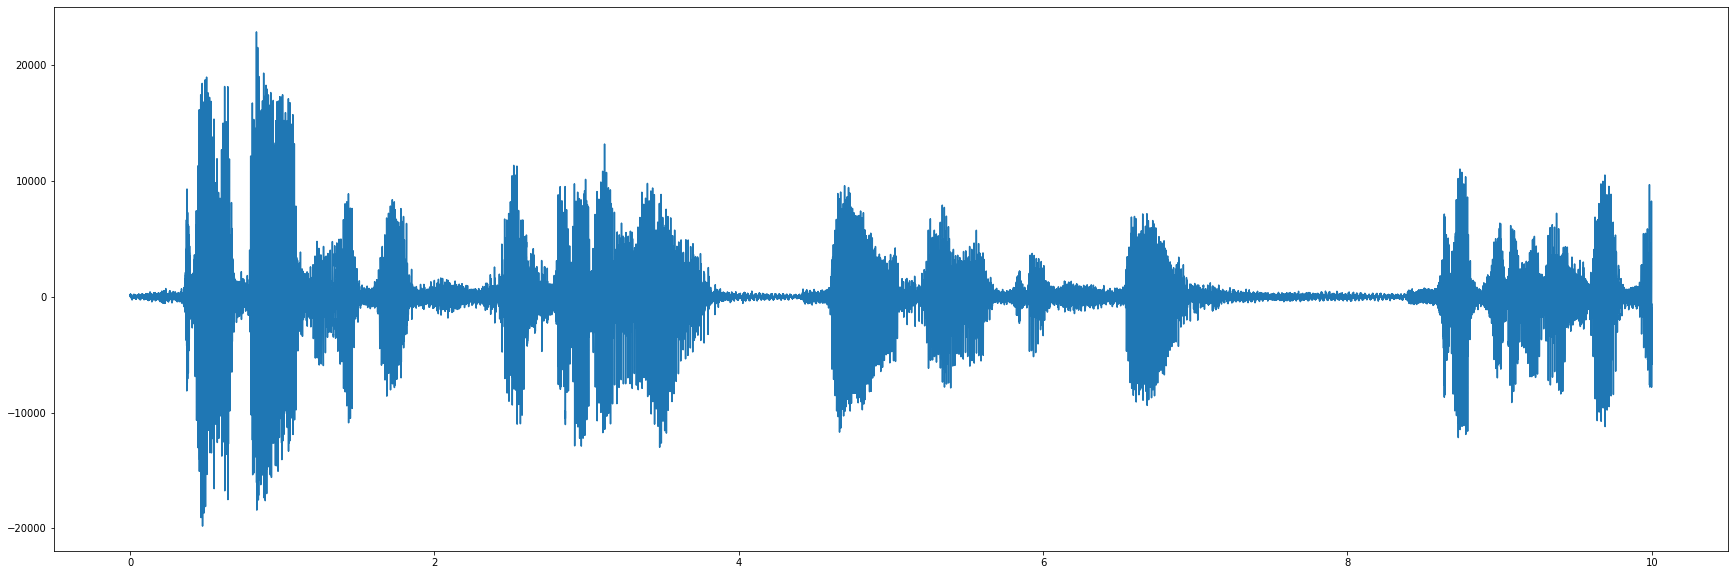

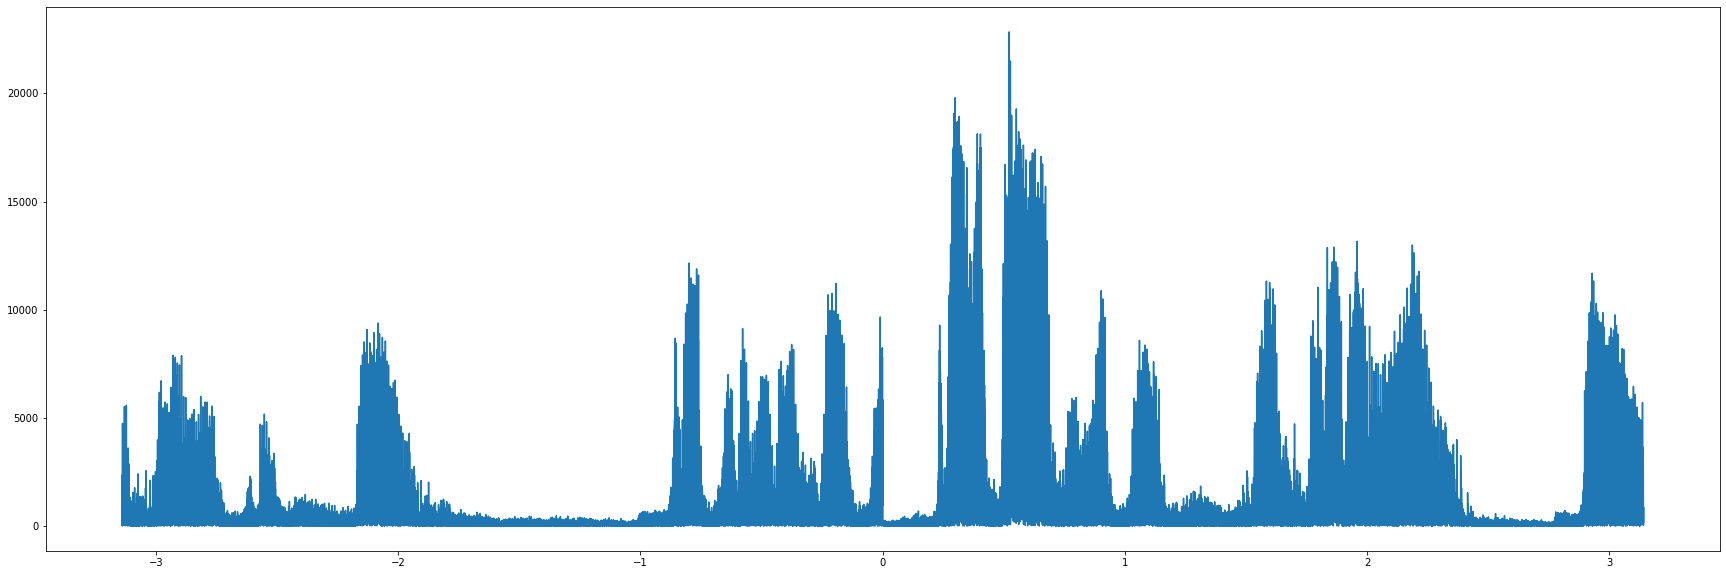

In [42]:
x, y_3n = time_scale(data_orig, sampling_rate_orig, scale = 3)
x_3n, f_t_3n = make_fft(y_3n)
plt.figure(figsize=(30,10))
plt.plot(x, y_3n)
plt.figure(figsize=(30,10))
plt.plot(x_3n, f_t_3n)

This cell saves the final result in 'Ghayegh7_3.wav', you can uncomment it if you are using google colab enviroment

In [0]:
# wavfile.write('/content/drive/My Drive/Signal2/Ghayegh7_3.wav', sampling_rate_orig, y_3n)

# Question 8

Run the writen function and calculate DFT 

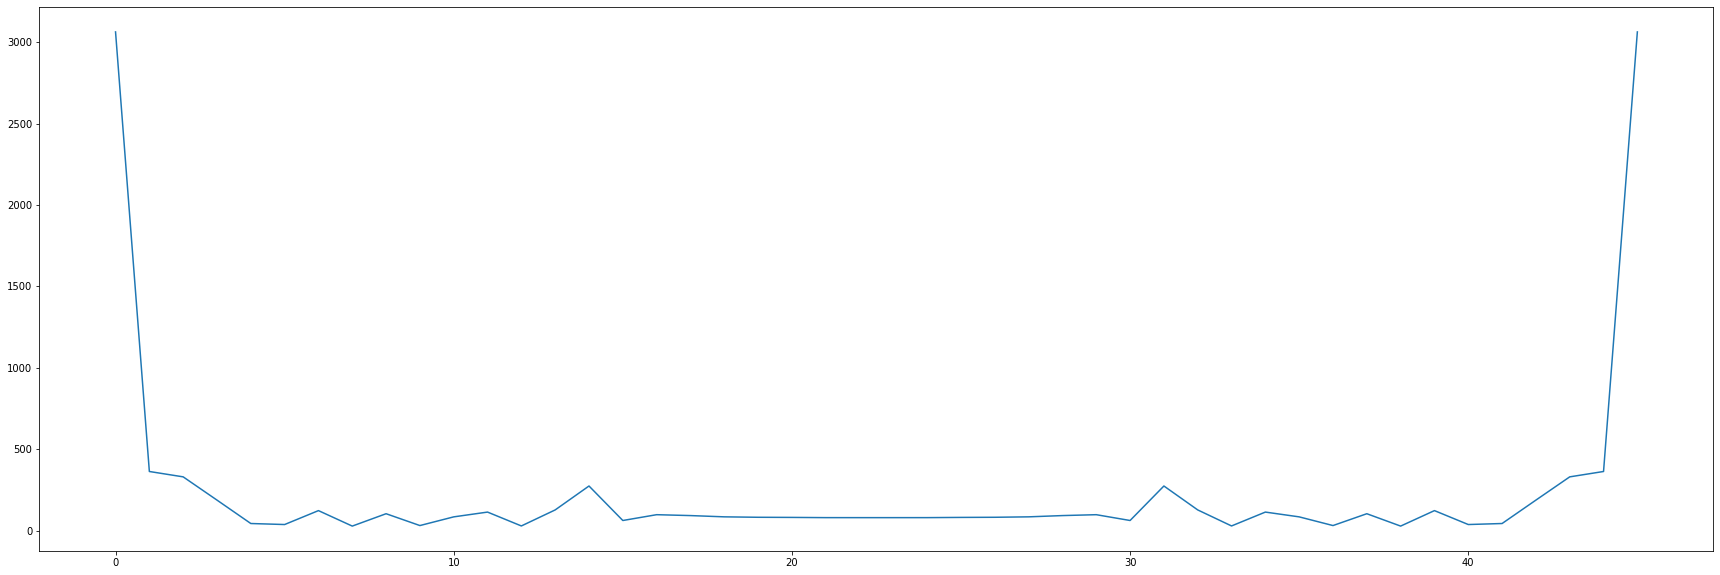

In [44]:
dft_result = dft(data_orig[0:45])
plt.figure(figsize=(30,10))
plt.plot(dft_result)